<a href="https://colab.research.google.com/github/MUbarak123-56/aurelion-geron-tensorflow/blob/master/chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

In [3]:
per_clf = Perceptron(random_state = 42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [4]:
X_new = [[2,0.5], [3,1]]
y_pred = per_clf.predict(X_new)

In [5]:
per_clf.coef_

array([[-1.4, -2.2]])

#### Multilayer Perceptron and Back Propagation

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [7]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [8]:
rmse

0.5053326657968684

#### Classification MLPs

In [9]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [10]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [11]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
y_train[0]

np.uint8(9)

In [14]:
class_names[y_train[0]]

'Ankle boot'

#### Creating a model using sequantial API

In [15]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [16]:
# the code above can be re-written as:

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [18]:
hidden1 = model.layers[1]

In [19]:
hidden1.name

'dense_3'

In [20]:
# model.get_layer("dense_9") is hidden1

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[-0.00957743, -0.04565798,  0.0654048 , ...,  0.01114037,
         0.01186728, -0.042594  ],
       [ 0.0484872 , -0.03673605, -0.01387734, ..., -0.06510979,
         0.00197028,  0.01954502],
       [ 0.06941757, -0.03476502, -0.06810217, ..., -0.00375227,
         0.06556989,  0.06788319],
       ...,
       [-0.05756684, -0.02651596,  0.03376777, ..., -0.04383033,
        -0.07042712,  0.06312296],
       [ 0.04110877, -0.06275137,  0.01475768, ..., -0.01461048,
         0.0399926 , -0.07214336],
       [-0.02369066,  0.06006071, -0.01420712, ..., -0.05146752,
        -0.02233277,  0.0526226 ]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

#### Compiling the model

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6811 - loss: 0.9989 - val_accuracy: 0.8244 - val_loss: 0.4987
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8280 - loss: 0.5006 - val_accuracy: 0.8394 - val_loss: 0.4506
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8453 - loss: 0.4488 - val_accuracy: 0.8478 - val_loss: 0.4268
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8554 - loss: 0.4191 - val_accuracy: 0.8488 - val_loss: 0.4127
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8624 - loss: 0.3979 - val_accuracy: 0.8528 - val_loss: 0.4005
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8668 - loss: 0.3811 - val_accuracy: 0.8584 - val_loss: 0.3908
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8708 - loss: 0.3667 - val_accuracy: 0.8614 - val_loss: 0.3827
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8735 - loss: 0.3544 -

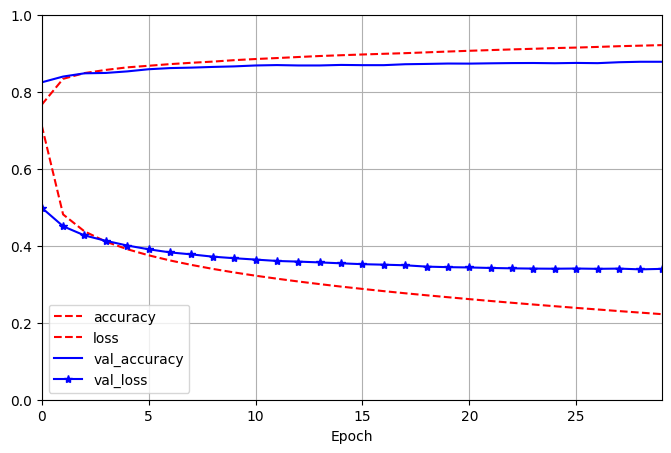

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch",style=["r--", "r--", "b-", "b-*"])
plt.show();

In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8757 - loss: 0.3639


[0.35981908440589905, 0.8751000165939331]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.02, 0.  , 0.89],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
import numpy as np
y_pred = y_proba.argmax(axis = 1)
y_pred

array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### Building a Regression MLP Using the Sequential API

In [34]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train) ## to learn the mean and standard deviation in the training data
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.2220 - loss: 1.6032 - val_RootMeanSquaredError: 0.6773 - val_loss: 0.4587
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6388 - loss: 0.4084 - val_RootMeanSquaredError: 0.7525 - val_loss: 0.5663
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6058 - loss: 0.3672 - val_RootMeanSquaredError: 0.8211 - val_loss: 0.6742
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5897 - loss: 0.3480 - val_RootMeanSquaredError: 0.8331 - val_loss: 0.6941
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5815 - loss: 0.3383 - val_RootMeanSquaredError: 1.2055 - val_loss: 1.4531
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5754 - loss: 0.3313 - val_RootMeanSquaredError: 1.4045 - val_loss: 1.9726
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5666 - los

#### Building Complex Models Using the Functional API

In [37]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [38]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 8)         │         17 │ input_layer_3[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 30)        │        270 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 30)        │        930 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [39]:
model.compile(loss="mse", loss_weights=0.9, optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))

In [40]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
  1/363 ━━━━━━━━━━━━━━━━━━━━ 1:17 215ms/step - loss: 7.4223

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8744 - val_loss: 1.5949
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6997 - val_loss: 1.0198
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6047 - val_loss: 0.5781
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5737 - val_loss: 0.5394
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5492 - val_loss: 0.4696
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5304 - val_loss: 0.4674
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5145 - val_loss: 0.4431
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5015 - val_loss: 0.4377
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4903 - val_loss: 0.4265
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4806 - val_loss: 0.4215
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4721 - val_loss: 0.4124
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.

In [41]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22']
Received: inputs=Tensor(shape=(3, 8))
  warnings.warn(msg)


In [42]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]


In [43]:
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
input_A = tf.keras.layers.Input(shape=[5], name="wide_input")
input_B = tf.keras.layers.Input(shape=[6], name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(1, name="main_output")(concat)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)
model = tf.keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [45]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))

In [46]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 5.4276 - loss: 3.7921 - main_output_loss: 3.6104 - val_aux_output_loss: 4.3592 - val_loss: 1.8607 - val_main_output_loss: 1.5825
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 3.4174 - loss: 1.1807 - main_output_loss: 0.9322 - val_aux_output_loss: 2.5409 - val_loss: 0.9508 - val_main_output_loss: 0.7739
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 2.2891 - loss: 0.9402 - main_output_loss: 0.7903 - val_aux_output_loss: 1.7661 - val_loss: 0.8164 - val_main_output_loss: 0.7106
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 1.7634 - loss: 0.8402 - main_output_loss: 0.7376 - val_aux_output_loss: 1.4770 - val_loss: 0.7556 - val_main_output_loss: 0.6753
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 1.5288 - loss: 0.7834 - main_output_loss: 0.7006 - val_aux_output_loss: 1.3681 - val_loss: 0.7163 - val_main_output_loss: 0.6437


In [47]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - aux_output_loss: 0.9394 - loss: 0.4887 - main_output_loss: 0.4386
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


#### Using the Subclassing API to build a Dynamic Model

In [48]:
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    # self.norm_layer_wide = tf.keras.layers.Normalization()
    # self.norm_layer_deep = tf.keras.layers.Normalization()
    self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
    self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
    self.main_output = tf.keras.layers.Dense(1)
    self.aux_output = tf.keras.layers.Dense(1)

  def call(self, inputs):
    input_wide, input_deep = inputs
    # norm_wide = self.norm_layer_wide(input_wide)
    # norm_deep = self.norm_layer_deep(input_deep)
    hidden1 = self.hidden1(input_deep)
    hidden2 = self.hidden2(hidden1)
    concat = tf.keras.layers.concatenate([input_wide, hidden2])
    output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return output, aux_output


model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [49]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3503 - mse_loss: 4.2602 - val_loss: 2.5662 - val_mse_loss: 2.6582
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0303 - mse_loss: 2.4160 - val_loss: 1.1560 - val_mse_loss: 1.9529
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8649 - mse_loss: 1.9282 - val_loss: 0.8510 - val_mse_loss: 1.7792
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7983 - mse_loss: 1.7199 - val_loss: 0.7527 - val_mse_loss: 1.7009
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7562 - mse_loss: 1.6042 - val_loss: 0.6997 - val_mse_loss: 1.6334
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7224 - mse_loss: 1.5241 - val_loss: 0.6627 - val_mse_loss: 1.5667
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6928 - mse_loss: 1.4598 - val_loss: 0.6321 - val_mse_loss: 1.5002
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6656 - mse_loss: 1.4043 - val_loss: 0.6061

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


### Saving and Restoring

In [81]:
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [83]:
keras.losses.MeanSquaredError(reduction='sum_over_batch_size')

<LossFunctionWrapper(<function mean_squared_error at 0x784ff160b7e0>, kwargs={})>

In [84]:
model.compile(loss=tf.keras.losses.MeanSquaredError(reduction='sum_over_batch_size'), optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4555 - val_loss: 2.9907
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8387 - val_loss: 1.0427
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7062 - val_loss: 0.6150
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6569 - val_loss: 0.5789
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6217 - val_loss: 0.5460
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5915 - val_loss: 0.5194
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5659 - val_loss: 0.4969
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5439 - val_loss: 0.4772
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5247 - val_loss: 0.4607
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5081 - val_loss: 0.4453
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4733


In [85]:
## saving a model
model.save("my_keras_model.h5")

In [86]:
tf.keras.models.load_model("my_keras_model.h5")

<Sequential name=sequential_4, built=True>

In [87]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[0.5653244],
       [1.4281974],
       [3.0903444]], dtype=float32)

#### Using Callbacks during Training

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [88]:
model.compile(loss=tf.keras.losses.MeanSquaredError(reduction='sum_over_batch_size'), optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
333/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4957

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4934 - val_loss: 0.4331
Epoch 2/10
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4812

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4808 - val_loss: 0.4226
Epoch 3/10
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4711

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4698 - val_loss: 0.4139
Epoch 4/10
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4610

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4603 - val_loss: 0.4065
Epoch 5/10
328/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4543

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4521 - val_loss: 0.4002
Epoch 6/10
329/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4470

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4450 - val_loss: 0.3946
Epoch 7/10
338/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4401

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4386 - val_loss: 0.3898
Epoch 8/10
327/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4350

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4329 - val_loss: 0.3855
Epoch 9/10
320/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4302

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4278 - val_loss: 0.3817
Epoch 10/10
329/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4251

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4233 - val_loss: 0.3783


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4017  


### Fine-Tuning Neural Network Hyperparameters

In [89]:
%pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [90]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [91]:
import keras_tuner as kt

In [92]:
tf.keras.backend.clear_session()

In [93]:
def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value = 0, max_value = 8, default = 2)
  n_neurons = hp.Int("n_neurons", min_value = 16, max_value = 256)
  learning_rate = hp.Float("learning_rate", min_value = 1e-4, max_value = 1e-2, sampling = "log")
  optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
  if optimizer == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())

  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation = "relu"))

  model.add(tf.keras.layers.Dense(10, activation = "softmax"))
  model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

  return model

In [94]:
random_search_tuner = kt.RandomSearch(build_model, objective = "val_accuracy", max_trials = 5, overwrite = True,
                                      directory = "my_fashion_mnist", project_name = "my_rnd_search", seed = 42)
random_search_tuner.search(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Trial 5 Complete [00h 00m 43s]
val_accuracy: 0.8320000171661377

Best val_accuracy So Far: 0.8557999730110168
Total elapsed time: 00h 03m 47s


In [95]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [96]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8557999730110168


In [97]:
best_trial.metrics.get_last_value("val_accuracy")

np.float64(0.8557999730110168)

In [98]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [99]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [101]:

from pathlib import Path

In [ ]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 25 Complete [00h 00m 19s]
val_accuracy: 0.8479999899864197

Best val_accuracy So Far: 0.854200005531311
Total elapsed time: 00h 07m 20s

Search: Running Trial #26

Value             |Best Value So Far |Hyperparameter
7                 |4                 |n_hidden
131               |50                |n_neurons
0.00011511        |0.00098245        |learning_rate
sgd               |adam              |optimizer
True              |False             |normalize
10                |10                |tuner/epochs
4                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
1                 |2                 |tuner/round
0020              |0013              |tuner/trial_id

Epoch 5/10
1458/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8116 - loss: 0.5345